In [3]:
# importing all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
# reading the input csv
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
#checking for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


#### The above shows that there are no null vaues in the columns. Also, all are in their correct datatypes.

### Analysing the data distribution

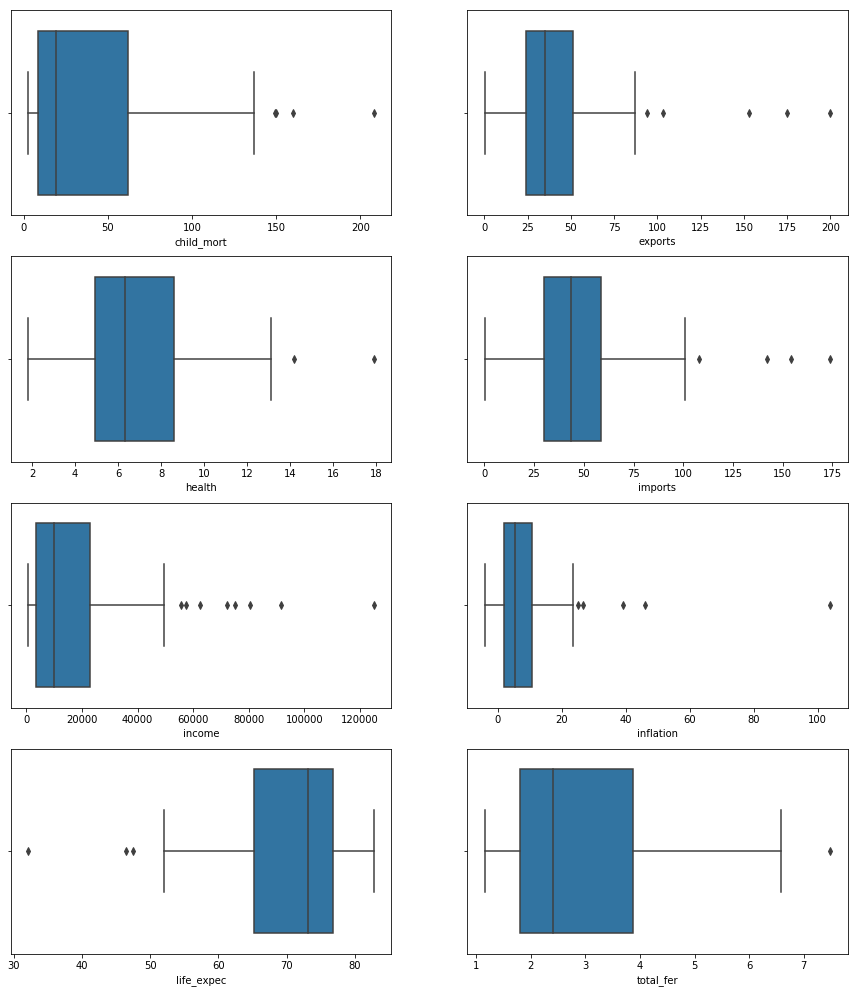

In [6]:
# box plot for all the numeric variables to check for outliers
plt.figure(figsize=(15,40))
clms=df.columns
for i in range(1,len(clms)-1):
    plt.subplot(9,2,i)
    sns.boxplot(clms[i],data=df)



Text(0.5, 1.0, 'gdpp vs child mortality')

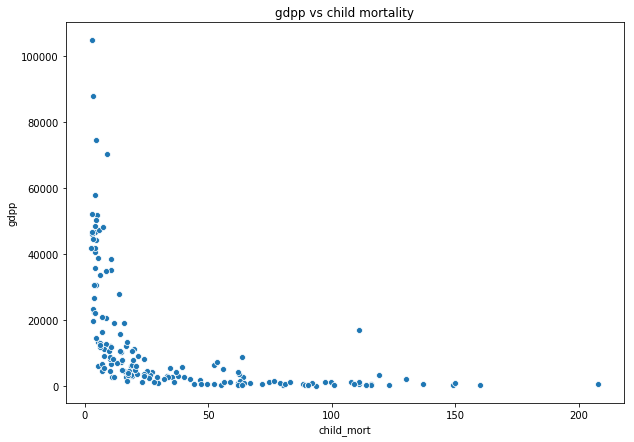

In [7]:
# initil EDA to check if there are some clusters
plt.figure(figsize=(10,7))
sns.scatterplot(df['child_mort'],df['gdpp'],palette='brg',legend='full')
plt.title("gdpp vs child mortality")

In [8]:
#checking the genral statistics of the data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
#creating a dataframe of only numeric columns for ease of use
df_numeric=df.drop('country',axis=1)


In [10]:
#countries which lie beyind 90 percentile gdpp
print(df[df_numeric['gdpp']>df_numeric['gdpp'].quantile(0.95)].shape[0])

#countries which lie beyind 90 percentile child mortality
print(df[df_numeric['child_mort']>df_numeric['child_mort'].quantile(0.95)].shape[0])

#countries which lie beyind 90 percentile life expectancy
print(df[df_numeric['life_expec']>df_numeric['life_expec'].quantile(0.95)].shape[0])

print(df[df_numeric['inflation']>df_numeric['inflation'].quantile(0.95)].shape[0])



9
8
8
9


In [11]:
#countries which lie beyond 95 percentile child mortality and gdpp
print(df[(df_numeric['gdpp']>df_numeric['gdpp'].quantile(0.95)) & (df_numeric['child_mort']>df_numeric['child_mort'].quantile(0.95)) ].shape[0])

#countries which lie beyond 95 percentile life expectancy and child mortality
print(df[(df_numeric['life_expec']>df_numeric['life_expec'].quantile(0.95)) & (df_numeric['child_mort']>df_numeric['child_mort'].quantile(0.95)) ].shape[0])

#countries which lie beyond 95 percentile life expectancy and gdpp
print(df[(df_numeric['life_expec']>df_numeric['life_expec'].quantile(0.95)) & (df_numeric['gdpp']>df_numeric['gdpp'].quantile(0.95)) ].shape[0])

#countries which lie beyond 95 percentile inflation and child mortality
print(df[(df_numeric['inflation']>df_numeric['inflation'].quantile(0.95)) & (df_numeric['child_mort']>df_numeric['child_mort'].quantile(0.95)) ].shape[0])



0
0
3
2


#### The above exercise shows that most  outliers are not in same rows and if we remove them we might be losing lot of countries from the data. The data is only of 167 records and losing records from this would not be correct. 

In [12]:
# scaling the data to provide it to PCA
scaler = StandardScaler()

X= scaler.fit_transform(df_numeric)


c:\program files\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\program files\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
#performing PCA on the data
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
# display PCA components
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [15]:
pca.explained_variance_ratio_


array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

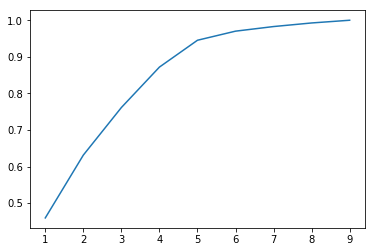

In [16]:
# Displaying the explained variance by the number of components
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

### The above graph shows that  around 85%+ data is explained using 4 Principal components. Hence 4 components are taken

In [17]:
pc2 = PCA(n_components=4, random_state=42)
newdata = pc2.fit_transform(X)
df_pca = pd.DataFrame(newdata, columns=["PC1", "PC2","PC3","PC4"])


In [18]:
var_cumu = np.cumsum(pc2.explained_variance_ratio_)


In [19]:
var_cumu

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786])

In [20]:
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


### Checking if the data is clusterable using hopkins score

In [21]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
rfm_df_scaled = pd.DataFrame(X)
rfm_df_scaled.columns = df_numeric.columns

In [23]:
hopkins(rfm_df_scaled)

0.846380477852368

### The Hopkins score indicates that the data is clusterable

### Using Kmeans algorithm on the data with clusters from 2 to 8.


Text(0.5, 1.0, 'Elbow plot- Number of clusters vs SSD')

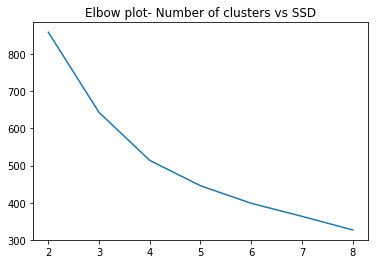

In [24]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=70,random_state=3)
    kmeans.fit(df_pca)
    
    ssd.append(kmeans.inertia_)
    
# plotting for elbow curve to find the optimal k
plt.plot(range_n_clusters,ssd)
plt.title("Elbow plot- Number of clusters vs SSD")

### The elbow is seen at number of clusters=4. Hence taking 4 clusters

In [25]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_pca)
kmeans.inertia_

514.1341570495548

In [26]:
#creating new column in the dataframe with kmeans cluster labels
df['cluster_kmeans']=kmeans.labels_

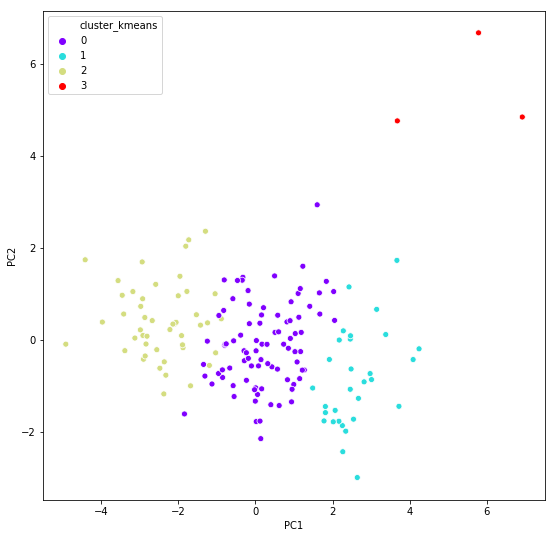

In [27]:
# Checking if the pca components can display some cluster behavior
plt.figure(figsize=(9,9))

sns.scatterplot(df_pca['PC1'],df_pca['PC2'], hue=df['cluster_kmeans'],palette='rainbow',legend='full')

Text(0.5, 1.0, 'Income vs gdpp')

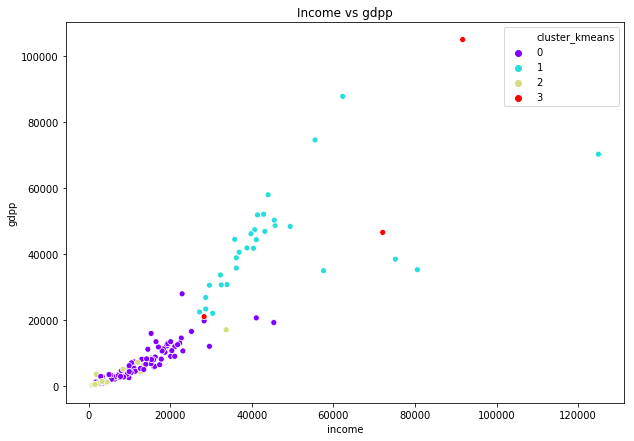

In [28]:
# plotting kmeans clusters for income vs gdpp
plt.figure(figsize=(10,7))
sns.scatterplot(df['income'],df['gdpp'],hue=df['cluster_kmeans'],palette='rainbow',legend='full')
plt.title("Income vs gdpp")

Text(0.5, 1.0, 'Income vs child mortality')

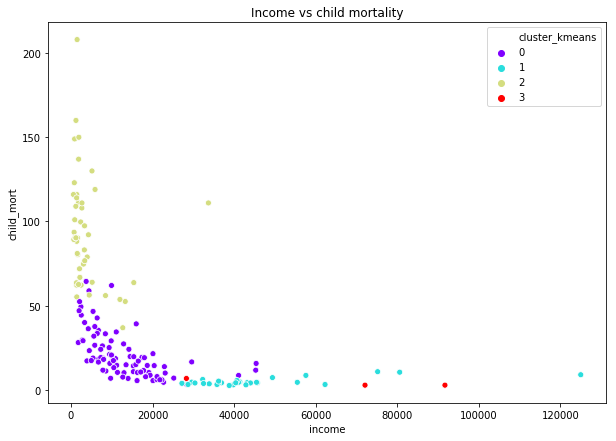

In [29]:
# clear clustering visible for poor countries (clusterlabel 2) where incom is low and child mortality is high
plt.figure(figsize=(10,7))
sns.scatterplot(df['income'],df['child_mort'],hue=df['cluster_kmeans'],palette='rainbow',legend='full')
plt.title("Income vs child mortality")

Text(0.5, 1.0, 'gdpp vs child mortality')

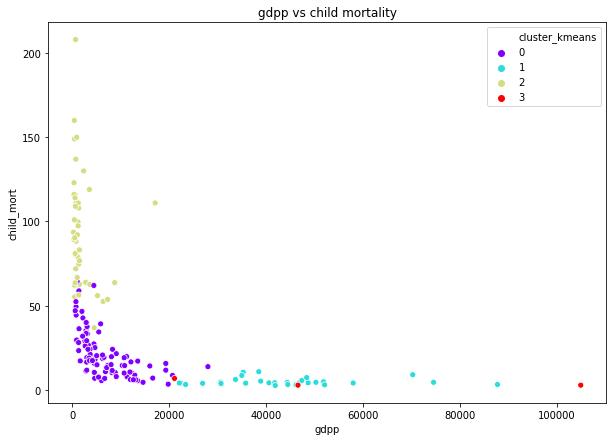

In [30]:
# clear clustering visible for poor countries (clusterlabel 2) where gdpp is low and child mortality is high

plt.figure(figsize=(10,7))
palette = sns.color_palette("bright", 5)  #Choosing color

sns.scatterplot(df['gdpp'],df['child_mort'],hue=df['cluster_kmeans'],palette='rainbow',legend='full')
plt.title("gdpp vs child mortality")

### Thus cluster 1 seems to be the cluster which is needy of aid

In [31]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=3)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
 

For n_clusters=2, the silhouette score is 0.3223238938928095
For n_clusters=3, the silhouette score is 0.33181002218025113
For n_clusters=4, the silhouette score is 0.3462272008168939
For n_clusters=5, the silhouette score is 0.2685851500386922
For n_clusters=6, the silhouette score is 0.28788324254402803
For n_clusters=7, the silhouette score is 0.29853918437686533
For n_clusters=8, the silhouette score is 0.2981663311361601


#### At cluster =4, the silhoute is maintained and is suddenly decreased at cluster=5. Thus 4 is the correct number of clusters

### Checking hierarchical clustering for the same data

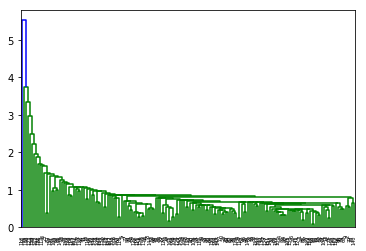

In [32]:
# single linkage
mergings = linkage(df_pca, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

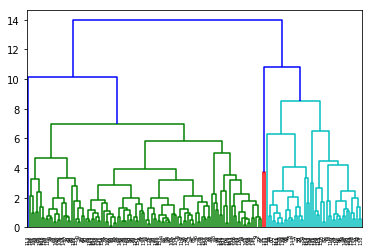

In [33]:
# complete linkage
mergings1 = linkage(df_pca, method="complete", metric='euclidean')
dendrogram(mergings1)
plt.show()

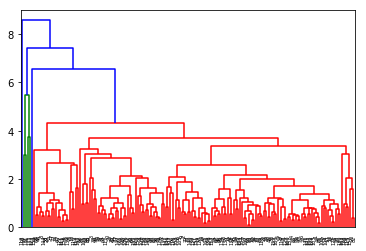

In [34]:
# complete linkage
mergings2 = linkage(df_pca, method="average", metric='euclidean')
dendrogram(mergings2)
plt.show()

#### The most clear linkage is shown in complete with 4 clusters. Hence taking the same

In [35]:
cluster_labels = cut_tree(mergings1, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 3, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [36]:
# assign cluster labels
df['cluster_hier'] = cluster_labels


### EDA with hierarchical clustering labels

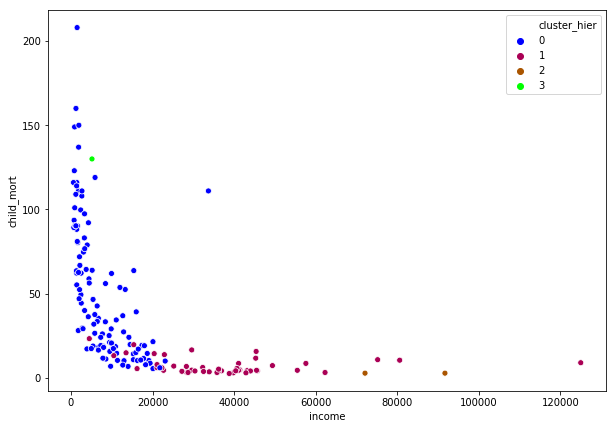

In [37]:
plt.figure(figsize=(10,7))

sns.scatterplot(df['income'],df['child_mort'],hue=df['cluster_hier'],palette='brg',legend='full')


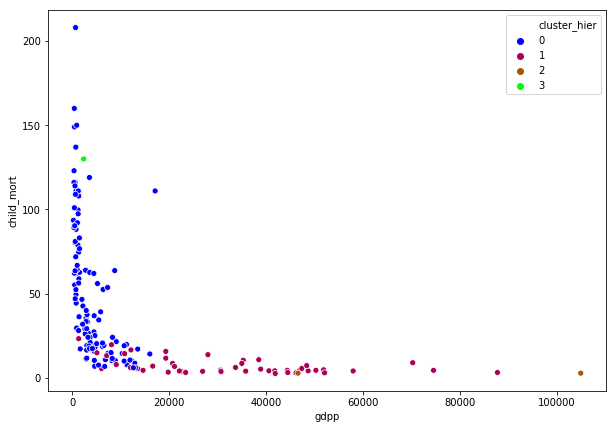

In [38]:
plt.figure(figsize=(10,7))

sns.scatterplot(df['gdpp'],df['child_mort'],hue=df['cluster_hier'],palette='brg',legend='full')

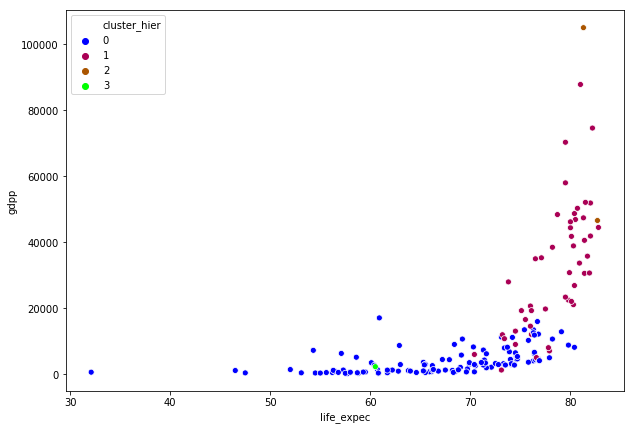

In [39]:
plt.figure(figsize=(10,7))

sns.scatterplot(df['life_expec'],df['gdpp'],hue=df['cluster_hier'],palette='brg',legend='full')

### Above analysis shows that cluster number 0 in hierarchical clustering largely resembles poor countries cluster in kmeans (the poorest countries cluster)

In [40]:
# The label of the cluster is changing hence referring cluster by the country in it
afgc=df[df['country']=='Afghanistan']['cluster_kmeans']
print(df[df['cluster_kmeans']==int(afgc)].shape)
df[df['cluster_kmeans']==int(afgc)]

(47, 12)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_hier
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,2,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2,0


### The above mentioned are  the countries which are socially and economically backward and need help

### Further the user can decide on what basis should the prioritization be done among these countries. It may be in increasing order of the health/ child mortality parameter etc. 